<h2>Importing necessary Libraries</h2>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb

#### Importing the dataset

In [43]:
df = pd.read_csv("D:/3 Trisem/ML/Project/Food_Delivery_Time.csv")

In [44]:
df.head(5)

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [46]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km)
count,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,9080.000000
mean,29.522000,4.629370,22.936907,66.164882,0.016233,14.292747
std,5.700348,0.322941,3.379448,15.602939,0.074911,8.376254
min,15.000000,1.000000,6.770000,27.000000,0.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,0.000000,7.620000
50%,29.000000,4.700000,23.000000,67.000000,0.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,0.000000,19.610000
max,50.000000,6.000000,29.050000,94.000000,1.460000,59.840000


### Data Cleaning

In [47]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              5
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      5
humidity                         5
precipitation                    5
Distance (km)                  920
TARGET                         541
dtype: int64

In [48]:
#Dropping all the null values 
df = df.dropna().copy()

In [49]:
df.shape

(9035, 17)

In [50]:
df.isnull().sum()

Traffic_Level                  0
ID                             0
Delivery_person_ID             0
weather_description            0
Type_of_order                  0
Type_of_vehicle                0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
temperature                    0
humidity                       0
precipitation                  0
Distance (km)                  0
TARGET                         0
dtype: int64

##### Cleaning the Target column

Here from our understanding of the datset we claim that 'TARGET' represents 'Delivery Time (in mins)'

In [51]:
#Before cleaning
df['TARGET']

0               43.45
1       3.816.666.667
2       3.636.666.667
3               49.45
4       5.248.333.333
            ...      
9995    1.246.666.667
9996             20.7
9997            20.25
9998             15.8
9999    1.416.666.667
Name: TARGET, Length: 9035, dtype: object

We decided to remove all the dots and take the first two values of the number that remains as a result of removing the dots

In [52]:
def clean_and_select_first_four(value):
    if isinstance(value, str):
        # Remove all dots
        cleaned = value.replace('.', '')
        # Select the first two characters
        return cleaned[:2]
    return value 

In [53]:
df['TARGET'] = df['TARGET'].apply(clean_and_select_first_four)
df["TARGET"] = df["TARGET"].astype(int)
#Target column after Cleanin
df['TARGET']

0       43
1       38
2       36
3       49
4       52
        ..
9995    12
9996    20
9997    20
9998    15
9999    14
Name: TARGET, Length: 9035, dtype: int64

### Exploratory Data Analysis

#### Understanding the distribution of variables

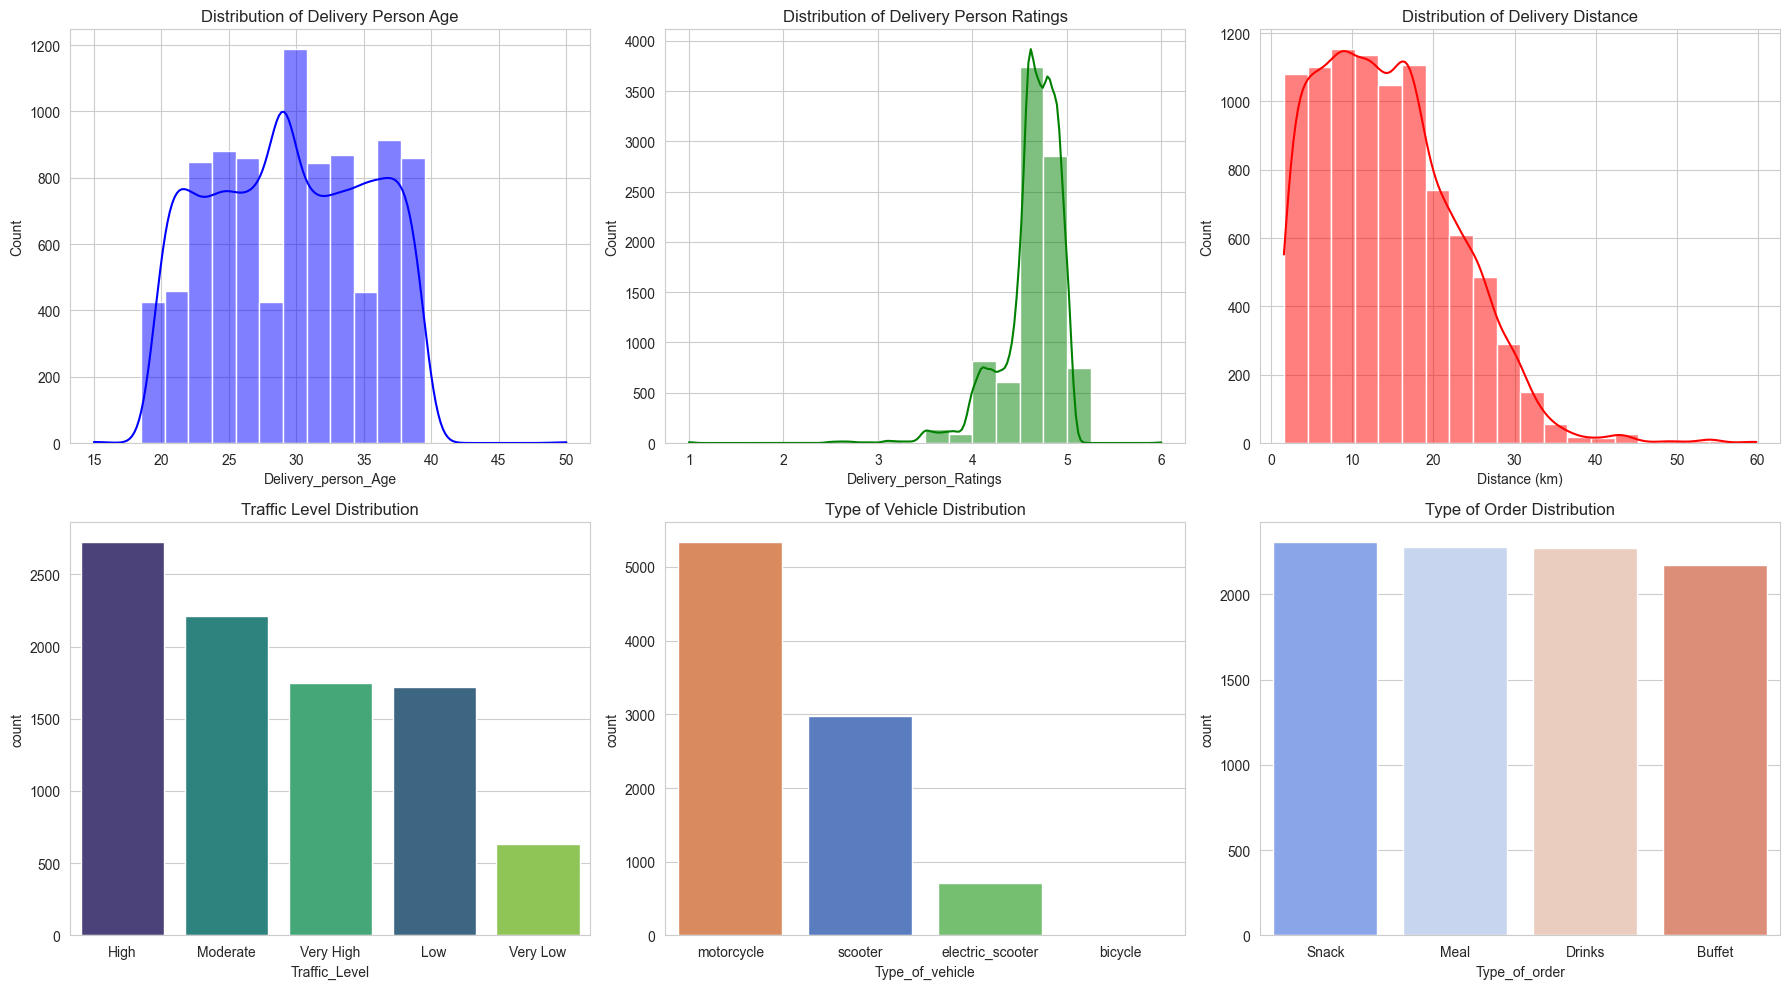

In [54]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df["Delivery_person_Age"], bins=20, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Delivery Person Age")

sns.histplot(df["Delivery_person_Ratings"], bins=20, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Delivery Person Ratings")

sns.histplot(df["Distance (km)"], bins=20, kde=True, ax=axes[0, 2], color="red")
axes[0, 2].set_title("Distribution of Delivery Distance")

sns.countplot(x="Traffic_Level", data=df, order=df["Traffic_Level"].value_counts().index, ax=axes[1, 0], palette="viridis", hue="Traffic_Level", legend=False)
axes[1, 0].set_title("Traffic Level Distribution")

sns.countplot(x="Type_of_vehicle", data=df, order=df["Type_of_vehicle"].value_counts().index, ax=axes[1, 1], palette="muted", hue="Type_of_vehicle", legend=False)
axes[1, 1].set_title("Type of Vehicle Distribution")

sns.countplot(x="Type_of_order", data=df, order=df["Type_of_order"].value_counts().index, ax=axes[1, 2], palette="coolwarm", hue="Type_of_order", legend=False)
axes[1, 2].set_title("Type of Order Distribution")

plt.tight_layout()
plt.show()

##### 1. Distribution of Delivery Person Age



<li>Peak: Around 30 years old.</li>
<li>Range: Mostly 20–40 years, suggesting that the workforce is quite young.</li>
<li>
Insight: Young adults dominate delivery roles, potentially due to flexibility or physical demand.</li>





##### 2. Distribution of Delivery Person Ratings


<li>Peak: Between 4.5 and 5.</li>
<li>Insight: Most delivery people maintain high ratings—suggesting good customer service or rating inflation.</li>

##### 3. Distribution of Delivery Distance

<li>Most deliveries: Under 20 km.</li>
<li>Insight: Deliveries tend to be short-distance, which is typical in urban areas.</li>

##### 4. Traffic Level Distribution

<li>High traffic is most common, followed by Moderate and Very High.</li>
<li>Insight: Deliveries often occur in dense, congested environments. Might affect delivery time.</li>

##### 5. Type of Vehicle Distribution

<li>Motorcycles dominate, followed by scooters.</li>
<li>Electric scooters and bicycles are very rare.</li>
<li>Insight: Motorcycles are likely preferred due to speed and maneuverability in traffic.</li>

##### 6. Type of Order Distribution

<li>Fairly balanced across Snacks, Meals, Drinks, Buffet.</li>
<li>Insight: No significant skew, which implies all order types are equally demanded or sampled in the dataset.</li>

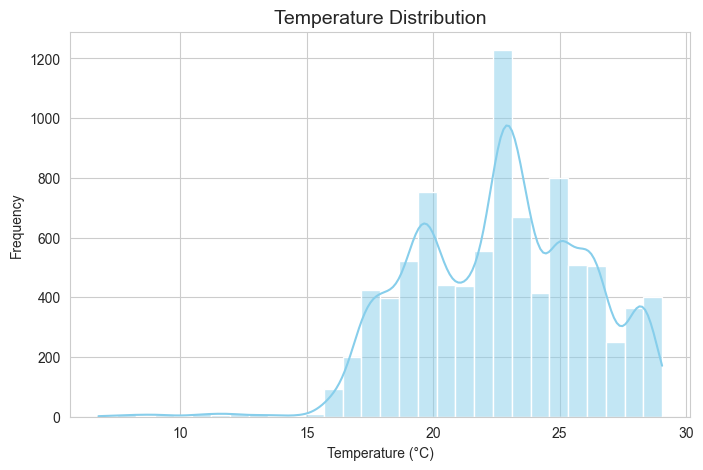

In [55]:
# Plot Temperature Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['temperature'], bins=30, kde=True, color='skyblue')
plt.title("Temperature Distribution", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



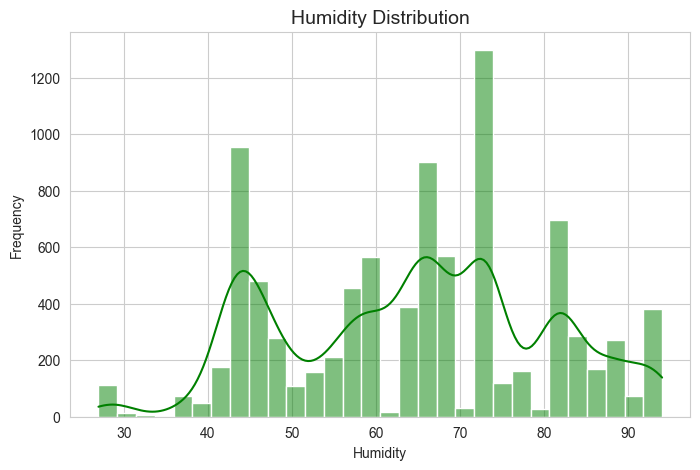

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df['humidity'], bins=30, kde=True, color='green')
plt.title("Humidity Distribution", fontsize=14)
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

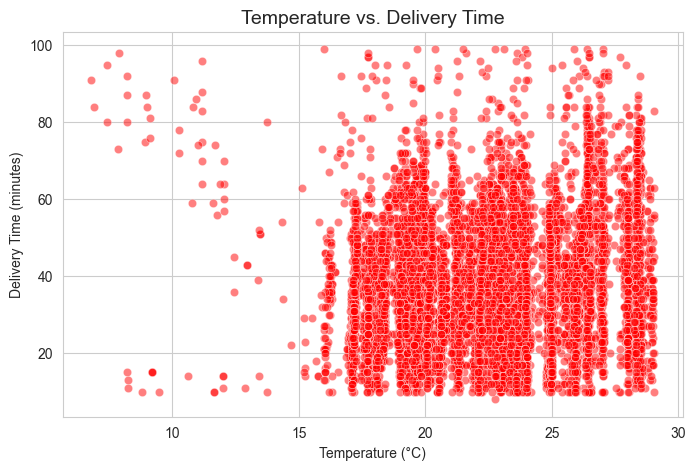

In [57]:
# Scatter Plot: Temperature vs. Delivery Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['temperature'], y=df['TARGET'], alpha=0.5, color='red')
plt.title("Temperature vs. Delivery Time", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()

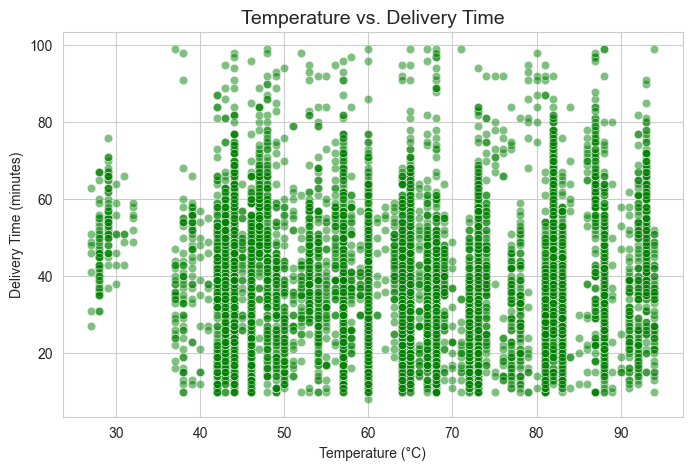

In [58]:
# Scatter Plot: Temperature vs. Delivery Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['humidity'], y=df['TARGET'], alpha=0.5, color='green')
plt.title("Temperature vs. Delivery Time", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()

In [59]:
df_cleaned = df[(df["Delivery_person_Ratings"] <= 5) & (df["Delivery_person_Age"] >= 18)]

##### Correlation Heatmap to find variable relationship with TARGET

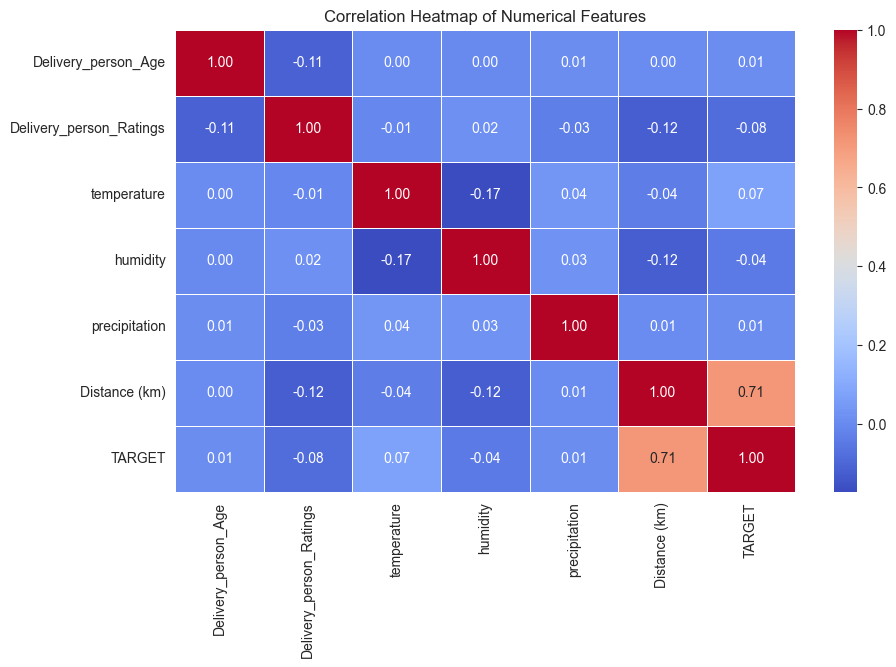

In [60]:
# Selecting only numerical columns
numerical_df = df_cleaned.select_dtypes(include=[np.number])

# Creating a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()






The heatmap presents the Pearson correlation coefficients among numerical variables, providing a overview of linear relationships:

- The most notable correlation is observed between Distance (km) and Delivery Time (TARGET), with a coefficient of 0.71, indicating a strong positive correlation. This suggests that as distance increases, delivery time also increases substantially.

- Other numerical features such as temperature, precipitation, humidity, and Delivery_person_Ratings show very weak correlations (near zero) with the target variable, suggesting minimal linear influence.

- Delivery_person_Age also shows an insignificant correlation with delivery time, implying that the age of the delivery personnel does not systematically impact delivery performance.



##### Scatter plot for Distance vs Delivery Time(TARGET)

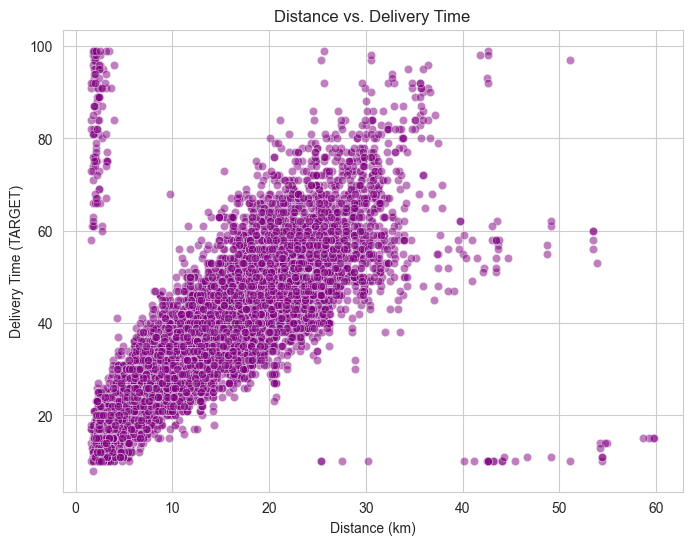

In [61]:
# Scatter plot of Distance vs. Delivery Time (TARGET)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Distance (km)"], y=df["TARGET"], alpha=0.5, color="purple")
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (TARGET)")
plt.show()

This scatter plot offers a visual validation of the heatmap findings by illustrating the relationship between distance traveled and delivery time.

- A clear positive linear trend is visible: as distance increases delivery time tends to rise.

- However, there is increased variability in delivery time at larger distances, possibly due to additional influencing factors such as traffic conditions, vehicle type, or route complexity.

- Outliers are present at both ends, with some long-distance deliveries being completed in surprisingly short times, and vice versa.

##### Box Plot to determine the impact of Traffic Level on Delivery Time

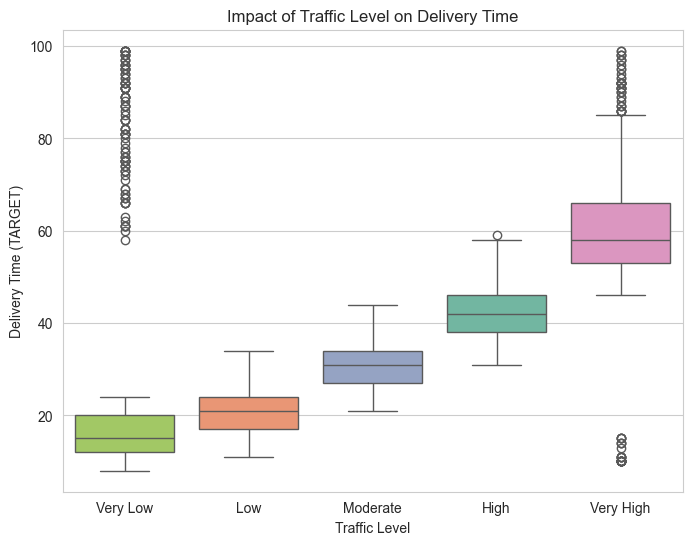

In [62]:
# Boxplot: Delivery Time by Traffic Level
plt.figure(figsize=(8, 6))
sns.boxplot(x="Traffic_Level", y="TARGET", data=df, palette="Set2", order=["Very Low", "Low", "Moderate", "High", "Very High"], hue="Traffic_Level", legend=False)
plt.title("Impact of Traffic Level on Delivery Time")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (TARGET)")
plt.show()

This box plot examines how traffic congestion levels affect delivery duration:

- A clear increasing trend in median delivery time is observed as traffic level progresses from Very Low to Very High.

    - Very Low Traffic: Median ~15–20 minutes

    - Moderate Traffic: Median ~30 minutes

    - Very High Traffic: Median ~55–60 minutes

- The interquartile range (IQR) also widens with higher traffic levels, indicating greater variability in delivery times under congested conditions.

- The presence of outliers in all categories, especially at extreme traffic levels, reflects occasional delays or unusually quick deliveries.

- This suggests that traffic conditions have a significant and nonlinear effect on delivery performance, especially in high-traffic scenarios.

##### Density Plot showing Delivery Time vs Vehicle Type

<Axes: xlabel='TARGET', ylabel='Density'>

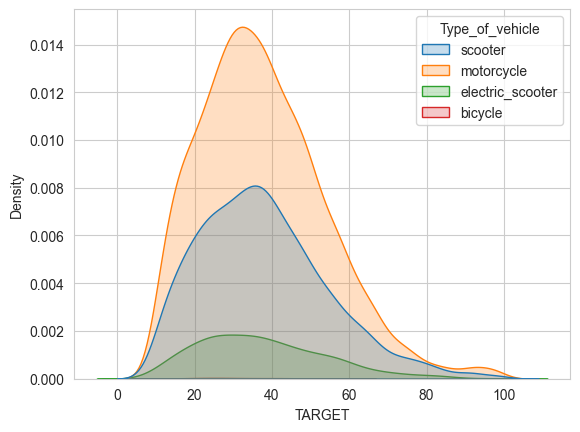

In [63]:
plt.figure(dpi=100)
sns.kdeplot(data=df,x='TARGET', hue='Type_of_vehicle', fill=True)

##### Boxplot: Delivery Time by Type of Vehicle

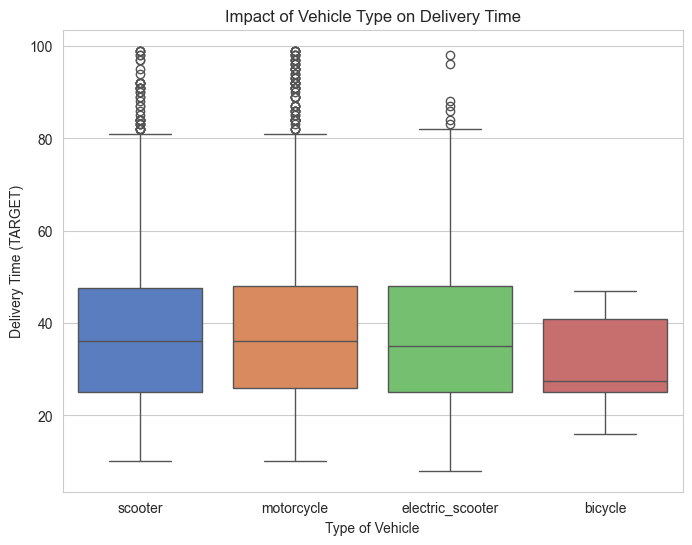

In [64]:
# Boxplot: Delivery Time by Type of Vehicle
plt.figure(figsize=(8, 6))
sns.boxplot(x="Type_of_vehicle", y="TARGET", data=df, palette="muted", hue="Type_of_vehicle", legend=False)
plt.title("Impact of Vehicle Type on Delivery Time")
plt.xlabel("Type of Vehicle")
plt.ylabel("Delivery Time (TARGET)")
plt.show()

- Motorcycles exhibit the highest and narrowest peak in the distribution, centered approximately around 30–35 minutes, indicating that they not only achieve the fastest delivery times but also demonstrate the most consistent performance. The distribution is moderately skewed to the right, suggesting occasional longer delivery times, although these are less frequent.

- Scooters follow closely behind motorcycles, with a slightly broader and flatter peak positioned near 35–40 minutes. This broader distribution suggests greater variability in delivery times when compared to motorcycles. Nevertheless, scooters remain a relatively efficient mode of transport in urban delivery contexts.

- Electric scooters display a much flatter and wider distribution, with delivery times ranging roughly from 30 to 60 minutes, and a peak density lower than both motorcycles and scooters. This indicates that deliveries using electric scooters are less consistent and generally slower. Furthermore, the lower density values suggest that electric scooters may be less frequently utilized in the dataset.

- The distribution for bicycles is nearly imperceptible, reflecting very low frequency or limited sample representation in the dataset. This scarcity could be attributed to bicycles being unsuitable for longer-distance or high-demand deliveries, leading to their underrepresentation.

### Removing Outliers

In [65]:
#Taking only columns that provide meaning
df = df[['Traffic_Level',
         'weather_description',
         'Type_of_order',
         'Type_of_vehicle',
         'Delivery_person_Age',
         'Delivery_person_Ratings',
         'temperature',
         'humidity',
         'Distance (km)',
         'TARGET']].copy() 

In [66]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Numerical columns for outlier removal
numeric_cols = ["Delivery_person_Age", "Delivery_person_Ratings", "temperature", 
                "humidity", "Distance (km)", "TARGET"]

# Function to remove outliers
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


df = df_cleaned.copy()

In [67]:
df.shape

(8315, 10)

### Encoding Categorical Columns

In [68]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Print value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'Traffic_Level':
Traffic_Level
High         2529
Moderate     2126
Low          1666
Very High    1438
Very Low      556
Name: count, dtype: int64

Value counts for 'weather_description':
weather_description
clear sky           2879
haze                2223
mist                1648
broken clouds        499
smoke                458
scattered clouds     368
overcast clouds      161
fog                   44
few clouds            35
Name: count, dtype: int64

Value counts for 'Type_of_order':
Type_of_order
Snack     2148
Drinks    2095
Meal      2073
Buffet    1999
Name: count, dtype: int64

Value counts for 'Type_of_vehicle':
Type_of_vehicle
motorcycle          4940
scooter             2701
electric_scooter     666
bicycle                8
Name: count, dtype: int64


In [69]:

#Making 5 categories in a column to 3 categories
traffic_mapping = {
    'Very Low': 'Low',
    'Low': 'Low',
    'Moderate': 'Moderate',
    'High': 'High',
    'Very High': 'High'
}

df['Traffic_Level_Simplified'] = df['Traffic_Level'].map(traffic_mapping)

#Ordinal Encoding Traffic Level since it is ordinal in nature
traffic_order = [['Low', 'Moderate', 'High']]
encoder = OrdinalEncoder(categories=traffic_order)
df['Traffic_Level_Encoded'] = encoder.fit_transform(df[['Traffic_Level_Simplified']])

df = df[df['weather_description'] != 'moderate rain'].copy()
#Minimising the number of categories
weather_mapping = {
    'clear sky': 'Clear',
    'few clouds': 'Clear',
    'haze': 'Hazy/Foggy',
    'mist': 'Hazy/Foggy',
    'fog': 'Hazy/Foggy',
    'smoke': 'Hazy/Foggy',
    'scattered clouds': 'Cloudy',
    'broken clouds': 'Cloudy',
    'overcast clouds': 'Cloudy'
}
df['weather_description'] = df['weather_description'].map(weather_mapping)

#One Hot encoding nominal variables
nominal_cols = ['weather_description', 'Type_of_order', 'Type_of_vehicle']
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})

#Dropping useless columns
df_encoded.drop(columns=['Traffic_Level', 'Traffic_Level_Simplified'], inplace=True)


df_encoded.head(5)


,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,Distance (km),TARGET,Traffic_Level_Encoded,weather_description_Cloudy,weather_description_Hazy/Foggy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,32,4.6,26.55,87.0,9.89,43,2.0,0,1,0,0,1,0,0,1
1,33,4.7,17.51,69.0,19.11,38,2.0,0,0,0,1,0,0,0,1
2,36,4.2,12.44,77.0,11.59,36,2.0,0,0,0,0,1,0,1,0
3,23,4.7,19.37,65.0,21.93,49,2.0,0,0,1,0,0,0,0,1
4,34,4.9,21.29,64.0,18.26,52,2.0,1,0,0,0,1,0,1,0


In [70]:
df_encoded.dtypes

Delivery_person_Age                   int64
Delivery_person_Ratings             float64
temperature                         float64
humidity                            float64
Distance (km)                       float64
TARGET                                int64
Traffic_Level_Encoded               float64
weather_description_Cloudy            int64
weather_description_Hazy/Foggy        int64
Type_of_order_Drinks                  int64
Type_of_order_Meal                    int64
Type_of_order_Snack                   int64
Type_of_vehicle_electric_scooter      int64
Type_of_vehicle_motorcycle            int64
Type_of_vehicle_scooter               int64
dtype: object

### Feature Selection through Feature Importance

In [ ]:

X = df_encoded.drop(columns=['TARGET'])
y = df_encoded['TARGET']
from sklearn.feature_selection import RFE
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf, n_features_to_select=6)  
rfe.fit(X_train, y_train)

rfe_ranking = pd.DataFrame({
    "Feature": X_train.columns,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print(rfe_ranking)

                             Feature  Ranking
3                           humidity        1
2                        temperature        1
5              Traffic_Level_Encoded        1
4                      Distance (km)        1
9                 Type_of_order_Meal        1
8               Type_of_order_Drinks        1
0                Delivery_person_Age        2
1            Delivery_person_Ratings        3
7     weather_description_Hazy/Foggy        4
10               Type_of_order_Snack        5
11  Type_of_vehicle_electric_scooter        6
12        Type_of_vehicle_motorcycle        7
6         weather_description_Cloudy        8
13           Type_of_vehicle_scooter        9


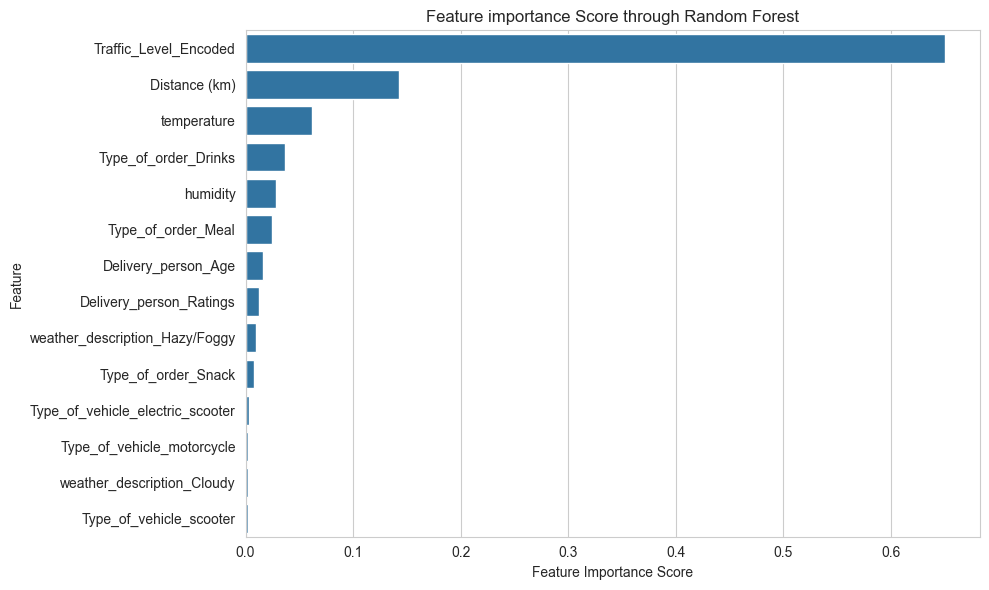

Traffic_Level_Encoded               0.650363
Distance (km)                       0.142635
temperature                         0.061878
Type_of_order_Drinks                0.036516
humidity                            0.028200
Type_of_order_Meal                  0.024834
Delivery_person_Age                 0.015948
Delivery_person_Ratings             0.012521
weather_description_Hazy/Foggy      0.009712
Type_of_order_Snack                 0.007529
Type_of_vehicle_electric_scooter    0.003369
Type_of_vehicle_motorcycle          0.002221
weather_description_Cloudy          0.002219
Type_of_vehicle_scooter             0.002056
dtype: float64

In [ ]:

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
# Predict on test set
y_pred = rf.predict(X_test)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature importance Score through Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

top_features


#### Implementing Random Forest Regressor using selected features

In [73]:
 
df_selected = df_encoded[
    ['Traffic_Level_Encoded', 'Distance (km)', 'Delivery_person_Age','weather_description_Hazy/Foggy', 'weather_description_Cloudy', 'temperature',
    'humidity', 'Type_of_order_Drinks', 'Type_of_order_Meal',
     'Type_of_order_Snack', 'TARGET']
]
# Train Random Forest
# Define X and y
X = df_selected.drop(columns=['TARGET'])
y = df_selected['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 3.2734486727944336
MSE: 28.276323972408687
RMSE: 5.317548680774694
R2 Score: 0.8692773261078028


#### HyperTuning Random Forest Regressor 

In [74]:

# Define parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

# Random Forest model
rof = RandomForestRegressor(random_state=42)

# Randomized search
random_search_rf = RandomizedSearchCV(
    estimator=rof,
    param_distributions=param_dist_rf,
    n_iter=25,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search_rf.fit(X_train, y_train)

# Best model
best_rf_model = random_search_rf.best_estimator_

# Evaluate
y_pred_rf = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Best Params for RF:", random_search_rf.best_params_)
print(f"R² Score: {r2:.4f}")    
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Params for RF: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
R² Score: 0.8690
RMSE: 5.32


#### Implementing XGBoost model

In [75]:
# Train XGBoost Regressor

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)


print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.8690
RMSE: 5.32


#### Hyper Tuning the XGBoost model using RandomSearchCV

In [76]:


# Parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=25,                
    scoring='r2',              
    cv=5,                      
    verbose=1,
    random_state=42,
    n_jobs=-1                  
)

# Run the search
random_search.fit(X_train, y_train)

# Best model
best_xgb_model = random_search.best_estimator_

# Evaluate
y_pred = best_xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Best Params:", random_search.best_params_)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
R² Score: 0.8731
RMSE: 5.24


#### Prediciting the Delivery Time using general inputs

In [77]:
def predict_delivery_time(model, traffic_level, distance, age, temperature, humidity, weather_desc, order_type):

    weather_hazy = 1 if weather_desc == "Hazy/Foggy" else 0
    weather_cloudy = 1 if weather_desc == "Cloudy" else 0

    # One-hot encode order type
    type_meal = 1 if order_type == "Meal" else 0
    type_drinks = 1 if order_type == "Drinks" else 0
    type_snack = 1 if order_type == "Snack" else 0

    input_df = pd.DataFrame([{
        'Traffic_Level_Encoded': traffic_level,
        'Distance (km)': distance,
        'Delivery_person_Age': age,
        'weather_description_Hazy/Foggy': weather_hazy,
        'weather_description_Cloudy': weather_cloudy,
        'temperature': temperature,
        'humidity': humidity,
        'Type_of_order_Drinks': type_drinks,
        'Type_of_order_Meal': type_meal,
        'Type_of_order_Snack': type_snack
    }])

    prediction = model.predict(input_df)[0]
    return round(prediction, 2)


In [78]:
# Random Forest Prediction
rf_pred_1 = predict_delivery_time(best_rf_model, traffic_level=2, distance=5.0, age=29,
                                  temperature=28.0, humidity=75.0, 
                                  weather_desc='Cloudy', order_type='Meal')

# XGBoost Prediction
xgb_pred_1 = predict_delivery_time(best_xgb_model, traffic_level=2, distance=5.0, age=29,
                                   temperature=28.0, humidity=75.0, 
                                   weather_desc='Cloudy', order_type='Meal')

print(f"RF Prediction (Test 1): {rf_pred_1} minutes")
print(f"XGB Prediction (Test 1): {xgb_pred_1} minutes")


RF Prediction (Test 1): 37.08 minutes
XGB Prediction (Test 1): 35.08000183105469 minutes


In [79]:
# Random Forest Prediction
rf_pred_2 = predict_delivery_time(best_rf_model, traffic_level=3, distance=12.5, age=32,
                                  temperature=32.0, humidity=85.0, 
                                  weather_desc='Hazy/Foggy', order_type='Drinks')

# XGBoost Prediction
xgb_pred_2 = predict_delivery_time(best_xgb_model, traffic_level=3, distance=12.5, age=32,
                                   temperature=32.0, humidity=85.0, 
                                   weather_desc='Hazy/Foggy', order_type='Drinks')

print(f"RF Prediction (Test 2): {rf_pred_2} minutes")
print(f"XGB Prediction (Test 2): {xgb_pred_2} minutes")


RF Prediction (Test 2): 47.18 minutes
XGB Prediction (Test 2): 46.79999923706055 minutes


#### Importing the model as pickle file for deployment

In [80]:
import pickle

with open("best_rf_model.pkl", "wb") as rf_file:
    pickle.dump(best_rf_model, rf_file)
    
with open("best_xgb_model.pkl", "wb") as xgb_file:
    pickle.dump(best_xgb_model, xgb_file)
